In [10]:
# importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
#importing the dataset
healthcare_dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
healthcare_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
healthcare_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

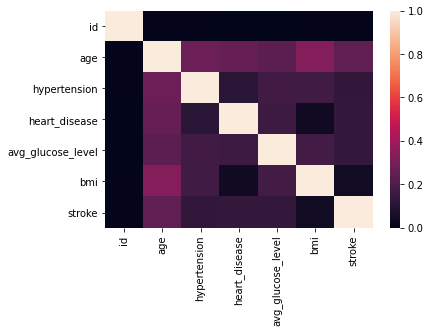

In [13]:
#analysing the correlation
corr = healthcare_dataset.corr()

# print (healthcare_dataset.corr())

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
#encoding the text categorical columns
dummy_array = ['work_type', 'Residence_type', 'smoking_status', 'gender', 'ever_married']

encoded_dataset = healthcare_dataset

for variable in dummy_array:
    dummy_variable = pd.get_dummies(encoded_dataset[variable])
    dummy_variable.drop(dummy_variable.columns[0], axis = 1, inplace = True)
    encoded_dataset = pd.concat([encoded_dataset, dummy_variable], axis = 1)
    encoded_dataset.drop([variable], axis = 1, inplace = True)
    
unique_encoded_data_columns = encoded_dataset.columns

encoded_dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,Male,Other,Yes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,1,0,0,1,0,1
1,51676,61.0,0,0,202.21,NaN,1,0,0,1,0,0,0,1,0,0,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,0,0,1,0,1,0,1
3,60182,49.0,0,0,171.23,34.4,1,0,1,0,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,0,0,1


In [15]:
#taking out the null values
print (encoded_dataset.isnull().values.any())
print (encoded_dataset.isnull().sum())

print (encoded_dataset.shape)

no_null_dataset = encoded_dataset.dropna(how = 'any')

print (no_null_dataset.isnull().values.any())
print (no_null_dataset.shape)
model_dataset = no_null_dataset.drop('id', axis = 1)


True
id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Never_worked           0
Private                0
Self-employed          0
children               0
Urban                  0
formerly smoked        0
never smoked           0
smokes                 0
Male                   0
Other                  0
Yes                    0
dtype: int64
(5110, 18)
False
(4909, 18)


In [16]:
#splitting the dataset
data_x = model_dataset.iloc[:, model_dataset.columns != 'stroke'].values
data_y = model_dataset.iloc[:, 5].values


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x,data_y,test_size=0.20,random_state=0)

print (X_train[0].shape)

(16,)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [18]:
#creating the neural network

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU

model = Sequential()
model.add(Dense(16, init = 'he_uniform', activation='relu', input_dim=16 ))
model.add(Dense(16, init = 'he_uniform', activation='relu'))
model.add(Dense(1, init= 'glorot_uniform', activation='sigmoid' ))
model.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train, Y_train, validation_split= 0.33, batch_size = 10, epochs=50)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", input_dim=16, kernel_initializer="he_uniform")`
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="he_uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 2631 samples, validate on 1296 samples
Epoch 1/50
2631/2631 [==============================] - 1s 346us/step - loss: 0.3774 - accuracy: 0.8750 - val_loss: 0.2392 - val_accuracy: 0.9522
Epoch 2/50
2631/2631 [==============================] - 0s 180us/step - loss: 0.1879 - accuracy: 0.9586 - val_loss: 0.1911 - val_accuracy: 0.9552
Epoch 3/50
2631/2631 [==============================] - 0s 167us/step - loss: 0.1630 - accuracy: 0.9590 - val_loss: 0.1761 - val_accuracy: 0.9552
Epoch 4/50
2631/2631 [==============================] - 1s 200us/step - loss: 0.1533 - accuracy: 0.9590 - val_loss: 0.1686 - val_accuracy: 0.9552
Epoch 5/50
2631/2631 [==============================] - 0s 152us/step - loss: 0.1479 - accuracy: 0.9590 - val_loss: 0.1670 - val_accuracy: 0.9552
Epoch 6/50
2631/2631 [==============================] - 0s 152us/step - loss: 0.1450 - accuracy: 0.9590 - val_loss: 0.1661 - val_accuracy: 0.9552
Epoch 7/50
2631/2631 [==============================] - 0s 144us/step - loss

In [19]:
#checking accuracy of the model
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)

from sklearn.metrics import accuracy_score
score = accuracy_score(predictions, Y_test)

In [20]:
print (score)

0.9501018329938901
